### import libararies

In [1]:
import pandas as pd

#### get the data for rating and check the head of the data

In [2]:
path=('C:\\Users\\Khushi verma\\Downloads\\ratings.csv')
rating_details = pd.read_csv(path) 
rating_details.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### get the data for the movies and check the head of the data

In [3]:
path=('C:\\Users\\Khushi verma\\Downloads\\movies.csv')
movies_details=pd.read_csv(path)
movies_details.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### if you want to check the shape of the database



In [4]:
rating_details.shape

(100836, 4)

##### we have (100836 rows and 4 columns)

In [5]:
movies_details.shape

(9742, 3)

##### we have (9742 rows and 4 colums)

#### now we use describe function so basically describe method will return you the basic statistic of your data count, mean,etc

In [6]:
rating_details.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
movies_details.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


### now we will merge the dataset we have ratings and movies

we use pandas.merge() function to merge dataset on the basis of movies id we will merge our dataset because mivie id will be our primary key for our dataset

In [8]:
dataset=pd.merge(rating_details,movies_details,on='movieId')
dataset.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


now we change our timestamp in our proper date time

In [9]:
import datetime
from datetime import datetime, date
dataset['datetime']=pd.to_datetime(dataset['timestamp'])

In [10]:
dataset.shape

(100836, 7)

#### we have (100836 rows and 7 columns)

now we will see hoe many non-unique data we have

In [11]:
dataset.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
datetime     85043
dtype: int64

we have repetative data so one person can see repetative movies

In [12]:
dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


##### now we will group by our data to see the average rating

In [13]:
a=dataset
a=a.groupby('title')['rating'].mean()
a

title
'71 (2014)                                                                                  4.000000
'Hellboy': The Seeds of Creation (2004)                                                     4.000000
'Round Midnight (1986)                                                                      3.500000
'Salem's Lot (2004)                                                                         5.000000
'Til There Was You (1997)                                                                   4.000000
'Tis the Season for Love (2015)                                                             1.500000
'burbs, The (1989)                                                                          3.176471
'night Mother (1986)                                                                        3.000000
(500) Days of Summer (2009)                                                                 3.666667
*batteries not included (1987)                                                       

now we will sort our dataset in decending order

In [14]:
sorted_ratings_wise_movies=a.sort_values(ascending=False)

In [15]:
sorted_ratings_wise_movies

title
Karlson Returns (1970)                                5.0
Winter in Prostokvashino (1984)                       5.0
My Love (2006)                                        5.0
Sorority House Massacre II (1990)                     5.0
Winnie the Pooh and the Day of Concern (1972)         5.0
Sorority House Massacre (1986)                        5.0
Bill Hicks: Revelations (1993)                        5.0
My Man Godfrey (1957)                                 5.0
Hellbenders (2012)                                    5.0
In the blue sea, in the white foam. (1984)            5.0
Won't You Be My Neighbor? (2018)                      5.0
Red Sorghum (Hong gao liang) (1987)                   5.0
Love Exposure (Ai No Mukidashi) (2008)                5.0
My Sassy Girl (Yeopgijeogin geunyeo) (2001)           5.0
The Love Bug (1997)                                   5.0
Ballad of Narayama, The (Narayama bushiko) (1983)     5.0
Heidi Fleiss: Hollywood Madam (1995)                  5.0
Louis Th

Total number of rating for a particular movie

In [16]:
b=dataset.groupby('title')['rating'].count()
b.tail()

title
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, dtype: int64

In [17]:
#making a new dataframe
new_record=pd.DataFrame()
new_record['Average_rating']=a

In [18]:
new_record['Count of total rating']=b
new_record.head()

,Average_rating,Count of total rating
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


# importing data visualization libraries

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [20]:
new_record.columns

Index(['Average_rating', 'Count of total rating'], dtype='object')

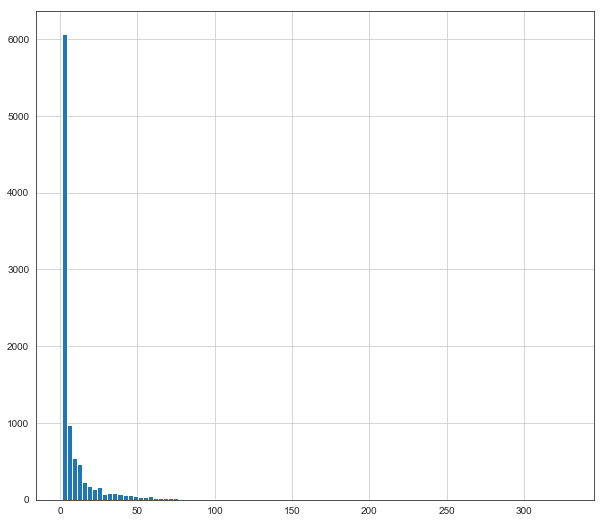

In [21]:
#plot graph of 'num of rating column'
plt.figure(figsize=(10,9))
new_record['Count of total rating'].hist(bins=100)

from the output you can see that most of thr movies have received less than 50 ratings. While the number of movies having more then 100 rating is very low.

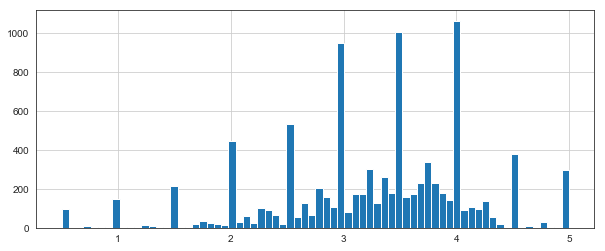

In [22]:
#plot grapgh for 'ratings' column
plt.figure(figsize=(10,4))
new_record['Average_rating'].hist(bins=70)

here we use histogram graph to visualize the data for that we use .hist function

You can see that the integer values have taller bars than the floating values since most of the user assign rating as integer values i.e
1,2,3,4pr 5.it is evident that the data has a week normal distribution with the mean of around 3.5 there are a few outliers in the data.

Earlier, we said that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known movie is watched by a large number of peoples,and thus usually has a higher rating.

<Figure size 576x432 with 0 Axes>

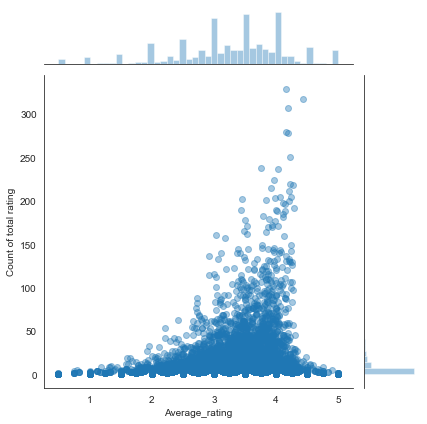

In [27]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Average_rating',y='Count of total rating',data=new_record,alpha=0.4)

this graph genearally shows that,in genneral movies with higher average ratings actually have more numbers of ratings compared with movies that have lower average rating.

In [32]:
#Sorting data according to the 'num of rating column'
moviematrix=dataset.pivot_table(index='userId',columns='title',values='rating')
moviematrix.head()
moviematrix.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

we make the pivot table where the column name are actually movies name

now we will check rating of particular movie and we will alos check similar movies like each other

In [36]:
moviematrix['xXx (2002)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      1.0
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     0.5
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
      ... 
581    NaN
582    NaN
583    NaN
584    NaN
585    NaN
586    NaN
587    NaN
588    NaN
589    NaN
590    NaN
591    NaN
592    NaN
593    NaN
594    NaN
595    NaN
596    NaN
597    NaN
598    NaN
599    NaN
600    NaN
601    NaN
602    NaN
603    NaN
604    NaN
605    NaN
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), Length: 610, dtype: float64

In [37]:
xXx_2002_ratings=moviematrix['xXx (2002)']

In [38]:
xXx_2002_ratings.tail()

userId
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), dtype: float64

# Find the similarity with other movies like xXx(2002)

In [42]:
movies_similar_to_xXx2002=moviematrix.corrwith(xXx_2002_ratings)
movies_similar_to_xXx2002

title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                               NaN
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.831858
*batteries not included (1987)                                                       

# Now we will use HEATMAP to just to the correaltion in visualizing way

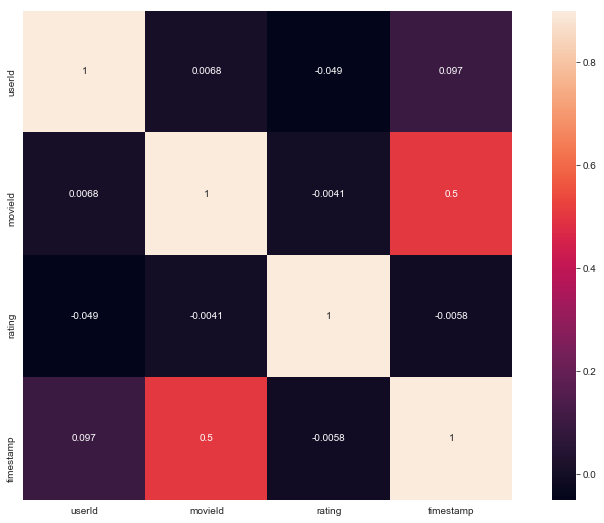

In [43]:
import matplotlib.pyplot as plt
correlation_matrics=dataset.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrics,annot=True,vmax=.9,square=True)
plt.show()

now we will see what correaltion we got in our dataframe

In [45]:
xXx_2002_corr=pd.DataFrame(movies_similar_to_xXx2002,columns=['Correlation'])
xXx_2002_corr.dropna(inplace=True)
xXx_2002_corr.head()

,Correlation
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325


In [ ]:
to drop non value we use dropna function